$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 2: DFT and FFT implementation

Implement the DFT and FFT algorithm, and compare their performance.

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal
from numpy.random import normal
from scipy.fft import fft, ifft

In [53]:
def DFT(x, N):
    k = np.linspace(0, N-1, N)
    u = 0
    
    Wn = np.exp(-1j*2*np.pi/N)
    W = np.zeros((N, N), complex)
    
    for i in range(N):
        for j in range(N):
            W[i,j] = (Wn**(k[j]))**u
        u += 1
        
    X = np.dot(W, x)
    
    return X

In [54]:
def butterfly(a, b):
    return a + b, a - b

def W(N, tam):
    k = np.arange(0, tam, 1)
    W = np.array(np.exp(-1j*2*np.pi*k/N))
    return W

def FFT(x, N):
    x_rev = np.zeros(N)
    
    for i in range(N):
        x_rev[i] = x[ int(bin(i)[2:].zfill(int(np.log2(N)))[::-1], 2) ]

    X = np.zeros(N, complex)
    X0 = x_rev
    
    for i in range(int(np.log2(N))):
        k = N/2**(i+1)
        p = 0
        
        for j in range(int(k)):
            for q in range(2**i):
                X[q + p], X[q + p + 2**i] = butterfly(X0[q + p], X0[q + p + 2**i])

            if(j % 2 != 0):
                X[p:q + p + 2**i + 1] = X[p:q + p + 2**i + 1] * W(N/2**(np.log2(N) - i - 2), 2**(i+1))

            p += 2**(i+1)
        X0 = X
    
    return X

In [55]:
class Signal():
    def __init__(self, t):
        self.t = t
    
    def constant(self, A):
        x = A*np.linspace(1, 1, len(self.t))
        return x
    
    def sine(self, A, f, phi):
        x = A*np.sin(2*np.pi*f*self.t + phi)
        return x
    
    def cosine(self, A, f, phi):
        x = A*np.cos(2*np.pi*f*self.t + phi)
        return x
    
    def squareWave(self, A, T):
        x = A*signal.square(2*np.pi*self.t/T, 0.5)
        return x
    
    def triangularWave(self, A, T):
        x = A*signal.sawtooth(2*np.pi*self.t/T, 0.5)
        return x
    
    def noise(self, σ, μ):
        x = normal(μ, σ, len(self.t))
        return x

In [56]:
d = True
N = int(input("Enter with the number of points N of the discrete transform: "))
N = int(2**np.ceil(np.log2(N)))

while(d == True):
    L = int(input("Enter with the number of samples of the signal: "))
    if(L > N):
        print('L can\'t be bigger than N!\n')
    else:
        d = False

n = np.linspace(0, N-1, N)

Enter with the number of points N of the discrete transform: 500
Enter with the number of samples of the signal: 500


In [57]:
Fs = 50       # Sampling frequency
Ts = 1/Fs     # Sampling period


Hello! Which signal do you want analyze?
 1 - Constant
 2 - Sine
 3 - Cosine
 4 - Square wave
 5 - Triangular wave
 6 - Noise
4
Amplitude: 1

Period: 2


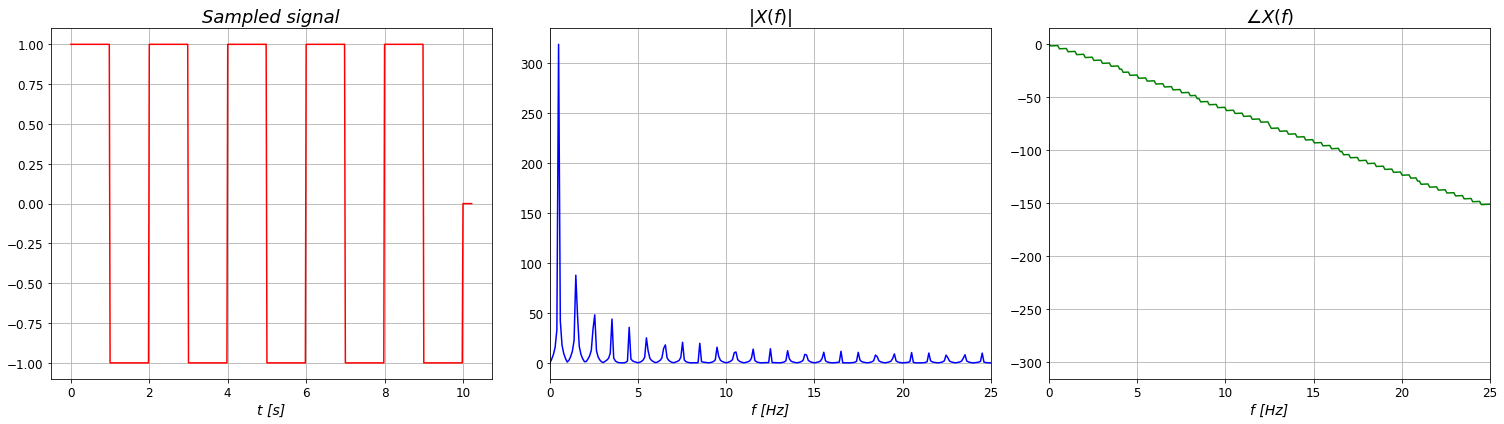

\Do you want to do another transform?
 y 
 n 
n


In [59]:
s = Signal(Ts*n[0:L])

d = 'y'

while(d == 'y'):
    fig, axs = plt.subplots(1, 3, figsize = (21, 6))
    
    i = int(input('\nHello! Which signal do you want analyze?\n 1 - Constant\n 2 - Sine\n 3 - Cosine\n 4 - Square wave\n 5 - Triangular wave\n 6 - Noise\n'))
    
    if(i == 1):
        A = float(input('Amplitude: '))
        
        x = np.pad(s.constant(A), (0, N - L), 'constant')
        
    elif(i == 2):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequency: '))
        phi = float(input('\nFase: '))
        
        x = np.pad(s.sine(A, f, phi), (0, N - L), 'constant')
        
    elif(i == 3):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequency: '))
        phi = float(input('\nPhase: '))
        
        x = np.pad(s.cosine(A, f, phi), (0, N - L), 'constant')
        
    elif(i == 4):
        A = float(input('Amplitude: '))
        T = float(input('\nPeriod: '))
        
        x = np.pad(s.squareWave(A, T), (0, N - L), 'constant')
        
    elif(i == 5):
        A = float(input('Amplitude: '))
        T = float(input('\nPeriod: '))
        
        x = np.pad(s.triangularWave(A, T), (0, N - L), 'constant')
        
    else:
        σ = float(input('Standard deviation: '))
        μ = float(input('\nMean: '))
        
        x = np.pad(s.noise(σ, μ), (0, N - L), 'constant')
    
    #X = DFT(x, N)  # DFT implementation
    X = FFT(x, N)  # FFT implementation
    #X = fft(x, N)  # Scipy function
    
    axs[0].plot(Ts*n, x, 'r')
    axs[0].set_title('Sampled signal', fontsize = 18, fontstyle = 'italic')
    axs[0].set_xlabel('t [s]', fontsize = 14, fontstyle = 'italic')
    axs[0].tick_params(axis = 'both', labelsize = 12)
    axs[0].grid()
    
    axs[1].plot(n*Fs/N, abs(X), 'b')
    axs[1].set_title(r'$|X(f)|$', fontsize = 18, fontstyle = 'italic')
    axs[1].set_xlabel('f [Hz]', fontsize = 14, fontstyle = 'italic')
    axs[1].set_xlim(0, Fs/2)
    axs[1].tick_params(axis = 'both', labelsize = 12)
    axs[1].grid()
    
    axs[2].plot(n*Fs/N, np.unwrap(np.angle(X)), 'g')
    axs[2].set_title(r'$\angle{X(f)}$', fontsize = 18, fontstyle = 'italic')
    axs[2].set_xlabel('f [Hz]', fontsize = 14, fontstyle = 'italic')
    axs[2].set_xlim(0, Fs/2)
    axs[2].tick_params(axis = 'both', labelsize = 12)
    axs[2].grid()

    plt.tight_layout()
    plt.show()
    
    d = input('\Do you want to do another transform?\n y \n n \n')

del s

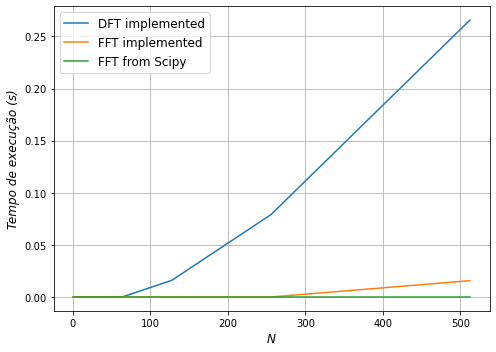

In [23]:
p = np.zeros(10) 
t1 = np.zeros(10) 
t2 = np.zeros(10) 
t3 = np.zeros(10) 

for i in range(len(p)):
    p[i] = 2**i
    
    N = int(p[i])
    L = N
    
    n = np.linspace(0, N-1, N)
    x = np.pad(np.linspace(1, 1 , L), (0, N - L), 'constant')  # Test with a constant signal
    
    # DFT implemented
    start = time.time()
    X = DFT(x, N)
    end = time.time()
    t1[i] = end - start
    
    # FFT implemented
    start = time.time()
    X = FFT(x,N)
    end = time.time()
    t2[i] = end - start
    
    # FFT from scipy
    start = time.time()
    X = fft(x,N)
    end = time.time()
    t3[i] = end - start
    
plt.figure(figsize = (7,5))
plt.plot(p, t1, label = 'DFT implemented')
plt.plot(p, t2, label = 'FFT implemented')
plt.plot(p, t3, label = 'FFT from Scipy')
plt.xlabel('N', fontsize = 12, fontstyle = 'italic')
plt.ylabel('Execution time (s)', fontsize = 12, fontstyle = 'italic')
plt.legend(fontsize = 12)
plt.grid()
plt.tight_layout()